In [111]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.constants as sc
import xraydb as xr

In [112]:
plt.style.use("ggplot")
#plt.rcParams["figure.figsize"] = [10, 8]

5. Las energías de ligadura de las capas K y L del  cesio  valen 36 keV y 5  keV respectivamente. Considerando fotones de 20 keV, 200 keV y 20 MeV calcule:
- (a) las energías de los fotoelectrones liberados de las capas K y L debido a la absorción de dichos fotones; 
- (b) las respectivas secciones eficaces  atómicas  de  absorción  fotoeléctrica; 
- (c) las  secciones  eficaces  atómicas  de  dispersión Compton a 90º;
- (d) las energías de los electrones de retroceso relativas a la pregunta anterior;
- (e) las secciones eficaces atómicas para la producción de pares; 

In [113]:
print(xr.__version__)

4.5.4


In [114]:
sc.find("light")
sc.physical_constants['speed of light in vacuum']
sc.physical_constants['speed of light in vacuum'][0]

299792458.0

In [115]:
sc.find("electron mass")
masa_electron_keV = sc.physical_constants['electron mass energy equivalent in MeV'][0] * 10**3

In [116]:
sc.find('J')
sc.physical_constants['electron volt-joule relationship'][0]

1.602176634e-19

In [117]:
sc.find('avogadro')
Na = sc.physical_constants['Avogadro constant'][0]

In [118]:
barn = 1e-28            # barn en m**2
sc.find('section')
t_cross_section = sc.physical_constants['Thomson cross section'][0]
t_cross_section

6.6524587321e-29

In [119]:
sc.find('planck')
#'Planck length'
#'Planck constant in eV/Hz'

h = sc.physical_constants['Planck constant'][0] 


In [120]:
sc.find('fine')
alpha = sc.physical_constants['fine-structure constant'][0]

In [121]:
sc.find('electron')
radio_electron = sc.physical_constants['classical electron radius'][0]

In [122]:
Be_K_Cs = 36 # keV
Be_L_Cs = 5 # keV

E_foton1 = 20 #keV
E_foton2 = 200 #keV
E_foton3 = 20 * (10**3) #keV

m0_c_2 = 511 #keV

### _Efecto fotoeléctrico_

In [123]:
#a)
#Energía
Energia = lambda hv, Be: hv-Be #No faltaría la masa en reposo del electrón? No estoy segura de donde sale
#preguntar signos

Energias =(Energia(E_foton1, Be_K_Cs), Energia(E_foton2, Be_K_Cs), Energia(E_foton3, Be_K_Cs), Energia(E_foton1, Be_L_Cs), Energia(E_foton2, Be_L_Cs), Energia(E_foton3, Be_L_Cs))
Energias

(-16, 164, 19964, 15, 195, 19995)

In [124]:
#b)
xr.atomic_number('Cs')
Z=55
atomo=xr.atomic_name(Z)                        # atomic_name (Z): devuelve el nombre del átomo de número atómico Z
densidad= xr.atomic_density(Z)                 # atomic_density (Z): devuelve la densidad del material puro de número atómico Z
masa= xr.atomic_mass(Z)                        # atomic_mass (Z): devuelve la masa en (g/mol) del átomo de número atómico Z

bordeK=xr.xray_edge(Z, 'K', True)              # x_ray.edge(Z, 'borde', energy_only='False' or 'True):
bordeL1=xr.xray_edge(Z, 'L1', True)            #            devuelve la energía del borde en eV
bordeL2=xr.xray_edge(Z, 'L2', True)
bordeL3=xr.xray_edge(Z, 'L3', True)

print('Elemento: ',atomo)                       # imprimo resultados
print('   Masa: ',masa,' g/mol')
print('   Dens: ',densidad,'g/cm**3')
print('   K :', bordeK, ' eV ',
      '   L1:', bordeL1,' eV ',
      '   L2:', bordeL2,' eV ',
      '   L3:', bordeL3,' eV ')

Elemento:  cesium
   Masa:  132.905  g/mol
   Dens:  1.87 g/cm**3
   K : 35985.0  eV     L1: 5714.0  eV     L2: 5359.0  eV     L3: 5012.0  eV 


In [125]:
#Sección eficaz
# Sección 1: En el primer caso el foton tiene una energía de 20 meV y la energía de ligadura de de la capa K del Cesio es 26 meV, cómo esta 
# es mayor a la energía incidente (h < Bek) se encuentra en la región 1. En esta región la sección eficaz se calcula por tabla.
# 
# # Más funciones útiles del módulo XrayDB: Secciones eficaces
# -------------------------------------------------------------------------------
E = E_foton1 * 10**3              # Energía del fotón en eV
xr.mu_elam(55, E, kind='photo')   # mu_elam(element, energy, kind='process') devuelve coeficiente de atenuación másico en (cm**2/g)
                                  # para el elemento, energía (eV) y proceso especificados (kind options:‘total’, ‘photo’, ‘coh’, ‘incoh’)

sigma_en_cm2_g=xr.mu_elam(55, E, kind='photo')      # sección eficaz en cm**2/g
sigma_en_cm2=sigma_en_cm2_g*masa/Na                 # sección eficaz en cm**2
sigma_en_barn=sigma_en_cm2*1e24                     # sección eficaz en barn 

Respuesta=sigma_en_barn
print(f"La sección eficaz fotoeléctrica para electrones de {E/1000:.0f} keV es {Respuesta:.1f} barn")

# Sección 2:  En el segundo caso el foton tiene una energía de 200 mev que se parece a la energía del electrón en reposo (511 kev). Por lo 
# tanto la sección eficaz se calcula de la siguiente manera:

alpha_v = lambda hv: hv / (masa_electron_keV)
n = lambda hv: 4.0 if (alpha_v(hv) <= 1) else 4.6

sigma2 = lambda Z,hv: (1/barn) * alpha**4 * t_cross_section * Z**n(hv) *(32/alpha_v(hv)**7)**(1/2)

Respuesta = sigma2(Z, E_foton2)

print(f"La sección eficaz fotoeléctrica para electrones de {E_foton2} keV es {Respuesta:.1f} barn")

# Sección 3: En el tercer caso el foton tiene una energía de 20 * 10**3 keV o sea es mucho mayor que la energía de reposo del electrón y se
# calcula así:

sigma3 = lambda Z,hv: (1/barn) * 1.5 * (alpha**4) * t_cross_section * (Z**5) /alpha_v(hv)

Respuesta = sigma3(Z, E_foton3)
print(f"La sección eficaz fotoeléctrica para electrones de {E_foton3} keV es {Respuesta:.3f} barn")

La sección eficaz fotoeléctrica para electrones de 20 keV es 5909.0 barn
La sección eficaz fotoeléctrica para electrones de 200 keV es 2.6 barn
La sección eficaz fotoeléctrica para electrones de 20000 keV es 0.036 barn


In [126]:
E = E_foton2 * 10**3              # Energía del fotón en eV
xr.mu_elam(55, E, kind='photo')   # mu_elam(element, energy, kind='process') devuelve coeficiente de atenuación másico en (cm**2/g)
                                  # para el elemento, energía (eV) y proceso especificados (kind options:‘total’, ‘photo’, ‘coh’, ‘incoh’)

sigma_en_cm2_g=xr.mu_elam(55, E, kind='photo')      # sección eficaz en cm**2/g
sigma_en_cm2=sigma_en_cm2_g*masa/Na                 # sección eficaz en cm**2
sigma_en_barn=sigma_en_cm2*1e24                     # sección eficaz en barn 

Respuesta=sigma_en_barn
print(f"La sección eficaz fotoeléctrica para electrones de {E/1000:.0f} keV es {Respuesta:.1f} barn")

La sección eficaz fotoeléctrica para electrones de 200 keV es 58.6 barn


In [127]:
np.cos((np.pi)/2)

6.123233995736766e-17

### _Dispersión de Compton_

In [128]:
#c)
#dThomson = lambda theta: radio_electron**2 * ((1+(np.cos(theta))**2)/2)
#hv_prima = lambda theta, hv: hv/(1 + alpha_v(hv) * (1-np.cos(theta)))
#G = lambda hv, theta:1 + ((alpha_v(hv)**2)*(1-np.cos(theta))**2*hv_prima(theta,hv))/((1+(np.cos(theta))**2)*hv)

dThomson = lambda theta: radio_electron**2 * (1/2)
hv_prima = lambda theta, hv: hv/(1 + alpha_v(hv))
G = lambda hv, theta:1 + ((alpha_v(hv)**2) * hv_prima(theta,hv))/hv


dsigma = lambda hv,theta, Z: Z *dThomson(theta) * (hv_prima(theta, hv)/hv)**2 * G(hv, theta)

Respuesta1 = dsigma(E_foton1, 90, 55)
Respuesta2 = dsigma(E_foton2, 90, 55)
Respuesta3 = dsigma(E_foton3, 90, 55)

print(f"La sección eficaz de dispersión de Compton para electrones de {E_foton1} keV es {Respuesta1} barn")
print(f"La sección eficaz de dispersión de Compton para electrones de {E_foton2} keV es {Respuesta2} barn")
print(f"La sección eficaz de dispersión de Compton para electrones de {E_foton3} keV es {Respuesta3} barn")

La sección eficaz de dispersión de Compton para electrones de 20 keV es 2.025297000452621e-28 barn
La sección eficaz de dispersión de Compton para electrones de 200 keV es 1.2521572179969314e-28 barn
La sección eficaz de dispersión de Compton para electrones de 20000 keV es 5.308221209317528e-30 barn


In [129]:
#d)

#Ee = lambda theta, hv: (hv * alpha_v(hv) * (1-np.cos(theta)))/(1+ alpha_v(hv) * (1-np.cos(theta)))
Ee = lambda hv, theta: (hv * alpha_v(hv))/(1+ alpha_v(hv))

Respuesta1 = Ee(E_foton1, 90)
Respuesta2 = Ee(E_foton2, 90)
Respuesta3 = Ee(E_foton3, 90)

print(f"La energía de retroceso para electrones de {E_foton1} keV es {Respuesta1:.3f} keV")
print(f"La energía de retroceso para electrones de {E_foton2} keV es {Respuesta2:.3f} keV")
print(f"La energía de retroceso para electrones de {E_foton3} keV es {Respuesta3:.3f} keV")


La energía de retroceso para electrones de 20 keV es 0.753 keV
La energía de retroceso para electrones de 200 keV es 56.259 keV
La energía de retroceso para electrones de 20000 keV es 19501.732 keV


### _Producción de pares_

In [130]:
#e
##PREGUNTAR

7. Utilizando el programa que usted desee grafique: 
- (a) La  energía  del  fotón  dispersado  en  una  interacción  Compton,  en  función  de  su  ángulo  de dispersión  y  de  la  energía  del  fotón  incidente.  Considere  energías  de  2  keV,  200  keV  y  2 MeV. 
- (b) La  energía  cinética  del  electrón  de  retroceso  en  una  dispersión  Compton,  en  función  del ángulo  de  dispersión  del  fotón  y  de  la  energía  del  fotón  incidente.  Considere  las  energías del apartado anterior. 
- (c) El  ángulo  de  retroceso  del  electrón  en  una  dispersión  Compton,  en  función  del  ángulo  de dispersión  y  de  la  energía  del  fotón  incidente.  Considere  las  energías  de  los  apartados anteriores. 
- (d) La sección eficaz diferencial atómica para la dispersión Thomson, en función del ángulo de dispersión. Considere silicio (Z = 14) y plomo (Z = 82). 
- (e) La sección eficaz diferencial atómica para la dispersión Compton, en función del ángulo de dispersión  y  de  la  energía  del  fotón  incidente.  Considerar  las  energías  de  los  apartados anteriores. Considere silicio (Z = 14) y plomo (Z = 82).    

### _Dispersión de Compton_

c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

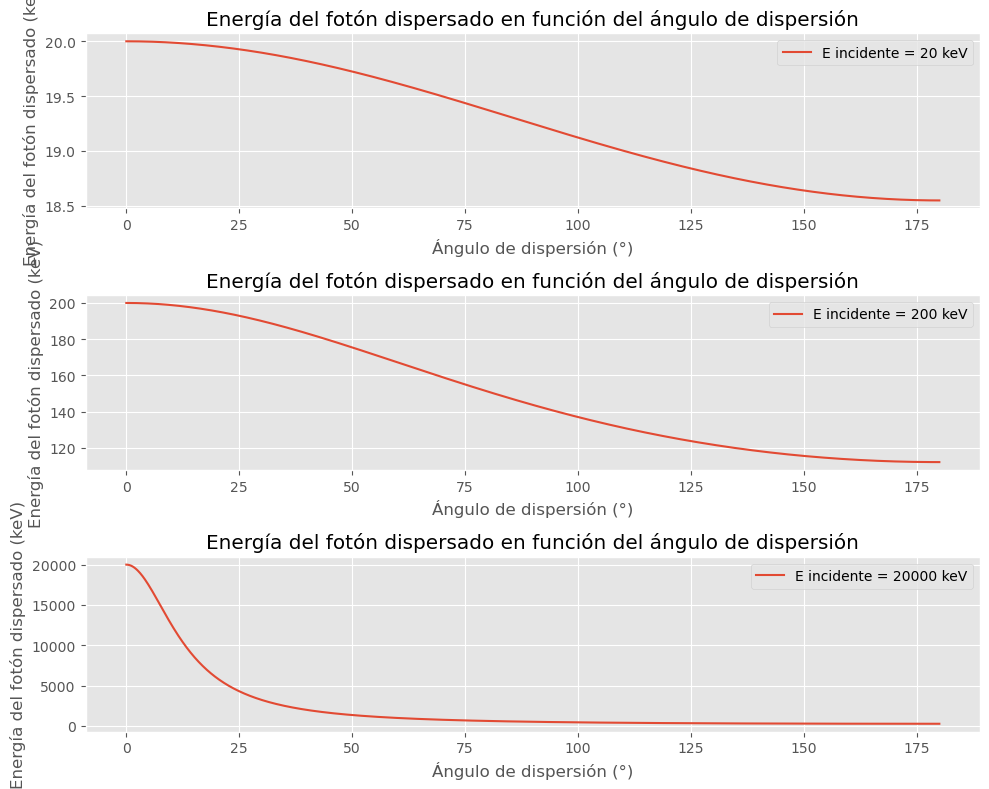

In [131]:
#a
thetas = np.linspace(0., np.pi, 1000)

hv_prima = lambda theta, hv: hv/(1 + alpha_v(hv) * (1-np.cos(theta))) 

#plt.subplot(m,n,p) m:filas, n:columnas: p:lugar
plt.subplot(3, 1, 1) 
sns.lineplot(x=np.degrees(thetas), y=hv_prima(thetas, E_foton1), label=f'E incidente = {E_foton1} keV')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Energía del fotón dispersado (keV)')
plt.title('Energía del fotón dispersado en función del ángulo de dispersión')
plt.legend()

plt.subplot(3, 1, 2)
sns.lineplot(x=np.degrees(thetas), y=hv_prima(thetas, E_foton2), label=f'E incidente = {E_foton2} keV')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Energía del fotón dispersado (keV)')
plt.title('Energía del fotón dispersado en función del ángulo de dispersión')
plt.legend()

plt.subplot(3, 1, 3)
sns.lineplot(x=np.degrees(thetas), y=hv_prima(thetas, E_foton3), label=f'E incidente = {E_foton3} keV')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Energía del fotón dispersado (keV)')
plt.title('Energía del fotón dispersado en función del ángulo de dispersión')
plt.legend()

plt.tight_layout()

plt.show()

c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

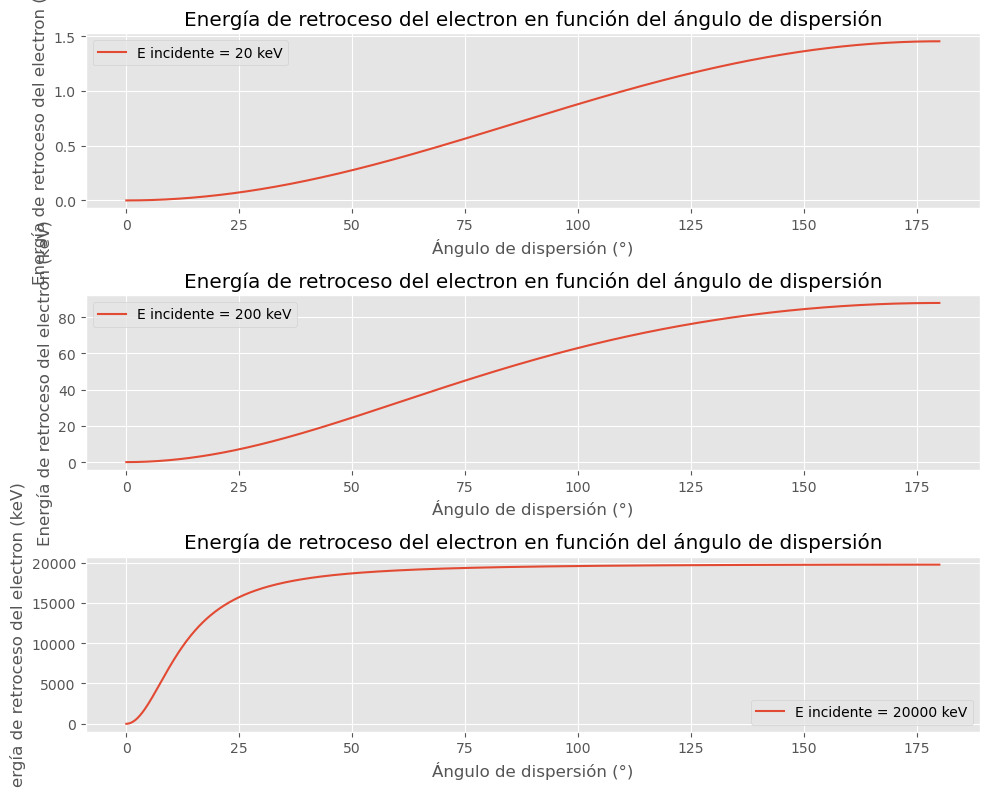

In [132]:
#b
thetas = np.linspace(0, np.pi, 1000)

E_retroceso = lambda theta, hv: hv - hv_prima(theta, hv)


#plt.subplot(m,n,p) m:filas, n:columnas: p:lugar
plt.subplot(3, 1, 1) 
sns.lineplot(x=np.degrees(thetas), y=E_retroceso(thetas, E_foton1), label=f'E incidente = {E_foton1} keV')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Energía de retroceso del electron (keV)')
plt.title('Energía de retroceso del electron en función del ángulo de dispersión')
plt.legend()

plt.subplot(3, 1, 2)
sns.lineplot(x=np.degrees(thetas), y=E_retroceso(thetas, E_foton2), label=f'E incidente = {E_foton2} keV')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Energía de retroceso del electron (keV)')
plt.title('Energía de retroceso del electron en función del ángulo de dispersión')
plt.legend()

plt.subplot(3, 1, 3)
sns.lineplot(x=np.degrees(thetas), y=E_retroceso(thetas, E_foton3), label=f'E incidente = {E_foton3} keV')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Energía de retroceso del electron (keV)')
plt.title('Energía de retroceso del electron en función del ángulo de dispersión')
plt.legend()

plt.tight_layout()

plt.show()

C:\Users\Oli\AppData\Local\Temp\ipykernel_7088\1771277259.py:4: RuntimeWarning: divide by zero encountered in divide
  phi = lambda theta, hv: np.arctan(1/((1 + alpha_v(hv)) * np.tan(theta/2)))
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oli\AppData\Local\Temp\ipykernel_7088\1771277259.py:4: RuntimeWarning: divide by zero encountered in divide
  phi = lambda theta, hv: np.arctan(1/((1 + alpha_v(hv)) * np.tan(theta/2)))
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

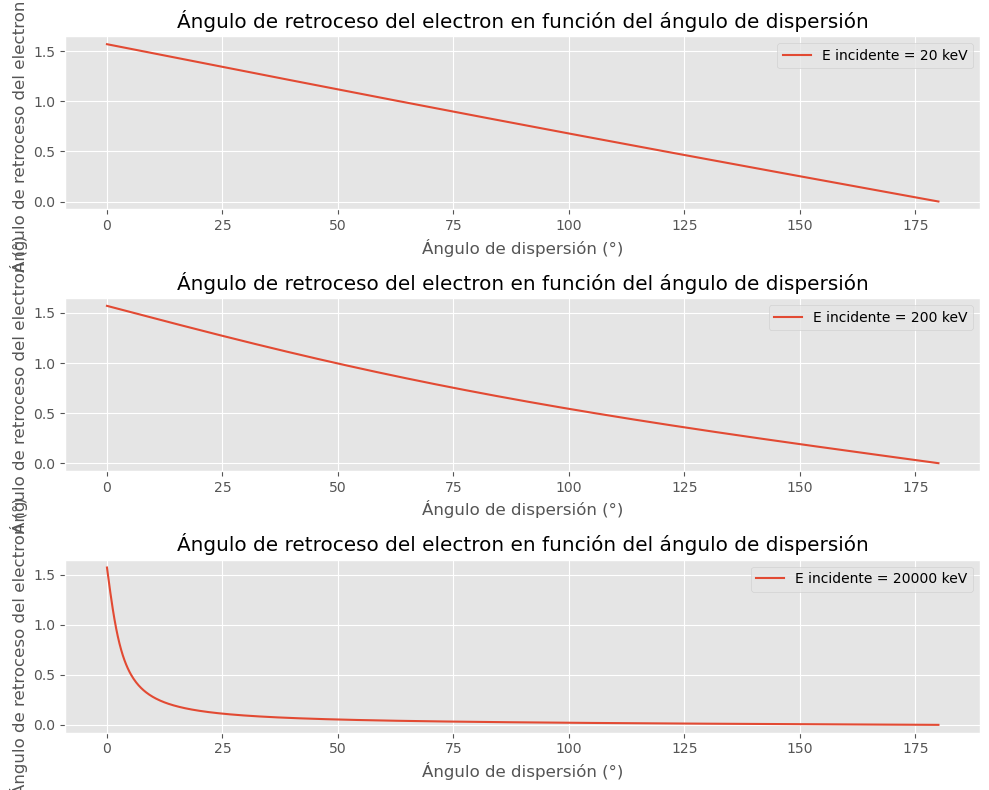

In [133]:
#c)
thetas = np.linspace(0, np.pi, 1000)

phi = lambda theta, hv: np.arctan(1/((1 + alpha_v(hv)) * np.tan(theta/2)))

plt.subplot(3, 1, 1) 
sns.lineplot(x=np.degrees(thetas), y=phi(thetas, E_foton1), label=f'E incidente = {E_foton1} keV')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Ángulo de retroceso del electron (°)')
plt.title('Ángulo de retroceso del electron en función del ángulo de dispersión')
plt.legend()

plt.subplot(3, 1, 2)
sns.lineplot(x=np.degrees(thetas), y=phi(thetas, E_foton2), label=f'E incidente = {E_foton2} keV')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Ángulo de retroceso del electron (°)')
plt.title('Ángulo de retroceso del electron en función del ángulo de dispersión')
plt.legend()

plt.subplot(3, 1, 3)
sns.lineplot(x=np.degrees(thetas), y=phi(thetas, E_foton3), label=f'E incidente = {E_foton3} keV')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Ángulo de retroceso del electron (°)')
plt.title('Ángulo de retroceso del electron en función del ángulo de dispersión')
plt.legend()

plt.tight_layout()

plt.show()

c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


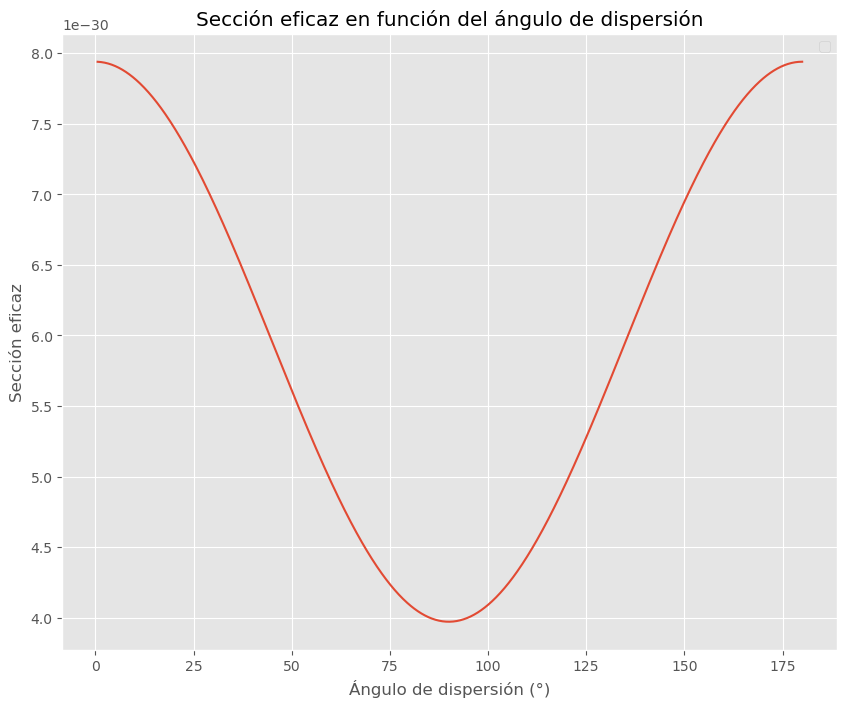

In [134]:
#d
thetas = np.linspace(0.01, np.pi, 1000)
dThomson = lambda theta: radio_electron**2 * ((1+(np.cos(theta))**2)/2)

sns.lineplot(x=np.degrees(thetas), y=dThomson(thetas))
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Sección eficaz')
plt.title('Sección eficaz en función del ángulo de dispersión')
plt.legend()
plt.show()

c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

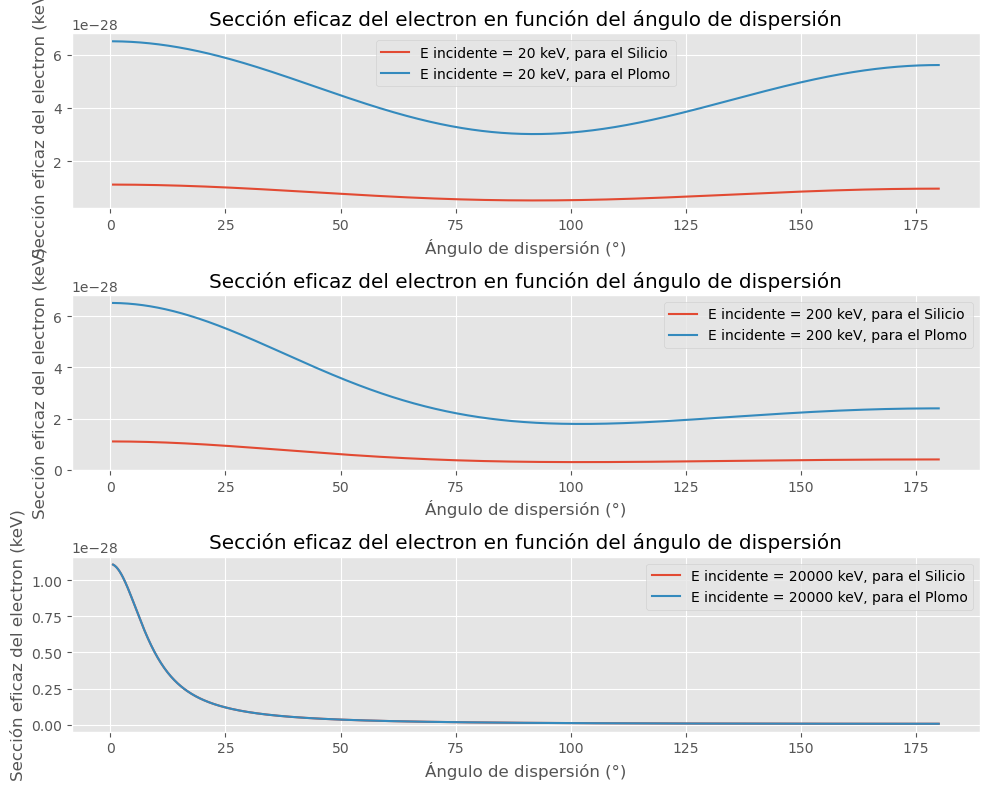

In [135]:
#e
thetas = np.linspace(0.01, np.pi, 1000)

dThomson = lambda theta: radio_electron**2 * ((1+(np.cos(theta))**2)/2)
hv_prima = lambda theta, hv: hv/(1 + alpha_v(hv) * (1-np.cos(theta)))
G = lambda hv, theta:1 + ((alpha_v(hv)**2)*(1-np.cos(theta))**2*hv_prima(theta,hv))/((1+(np.cos(theta))**2)*hv)

dsigma = lambda theta, hv, Z: Z *dThomson(theta) * (hv_prima(theta, hv)/hv)**2 * G(hv, theta)

Z_Si = 14
Z_Pb = 82

#plt.subplot(m,n,p) m:filas, n:columnas: p:lugar
plt.subplot(3, 1, 1) 

sns.lineplot(x=np.degrees(thetas), y=dsigma(thetas, E_foton1, Z_Si), label=f'E incidente = {E_foton1} keV, para el Silicio')
sns.lineplot(x=np.degrees(thetas), y=dsigma(thetas, E_foton1, Z_Pb), label=f'E incidente = {E_foton1} keV, para el Plomo')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Sección eficaz del electron (keV)')
plt.title('Sección eficaz del electron en función del ángulo de dispersión')
plt.legend()

plt.subplot(3, 1, 2)
sns.lineplot(x=np.degrees(thetas), y=dsigma(thetas, E_foton2, Z_Si), label=f'E incidente = {E_foton2} keV, para el Silicio')
sns.lineplot(x=np.degrees(thetas), y=dsigma(thetas, E_foton2, Z_Pb), label=f'E incidente = {E_foton2} keV, para el Plomo')
plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Sección eficaz del electron (keV)')
plt.title('Sección eficaz del electron en función del ángulo de dispersión')
plt.legend()

plt.subplot(3, 1, 3)
sns.lineplot(x=np.degrees(thetas), y=dsigma(thetas, E_foton3, Z_Si), label=f'E incidente = {E_foton3} keV, para el Silicio')
sns.lineplot(x=np.degrees(thetas), y=dsigma(thetas, E_foton3, Z_Si), label=f'E incidente = {E_foton3} keV, para el Plomo')

plt.xlabel('Ángulo de dispersión (°)')
plt.ylabel('Sección eficaz del electron (keV)')
plt.title('Sección eficaz del electron en función del ángulo de dispersión')
plt.legend()

plt.tight_layout()

plt.show()